In [1]:
from IPython.display import display,HTML
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.datasets import load_breast_cancer

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from scipy.stats import spearmanr

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, recall_score, precision_score
from tqdm import tqdm

from sklearn.neighbors import NearestNeighbors

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'Malgun Gothic')


In [2]:
breast_cancer = load_breast_cancer()
breast_cancer.data.shape

(569, 30)

In [3]:
X = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
y = pd.DataFrame(breast_cancer.target, columns = ['diagnosis'])

In [4]:
# 결측치 확인, 데이터 형태
X.info()
X.describe()
y['diagnosis'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

1    357
0    212
Name: diagnosis, dtype: int64

In [5]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, stratify = y, test_size = 0.3, random_state=2021)
# startify = Y를 test, train set으로 나누는 과정에서 0, 1이 한쪽으로 쏠리는 경우가 발생할 수 있음을 방지

normalizer = StandardScaler()
X_tr = normalizer.fit_transform(X_tr)
X_te = normalizer.transform(X_te)

X_tr.shape, X_te.shape, y_tr.shape, y_te.shape


((398, 30), (171, 30), (398, 1), (171, 1))

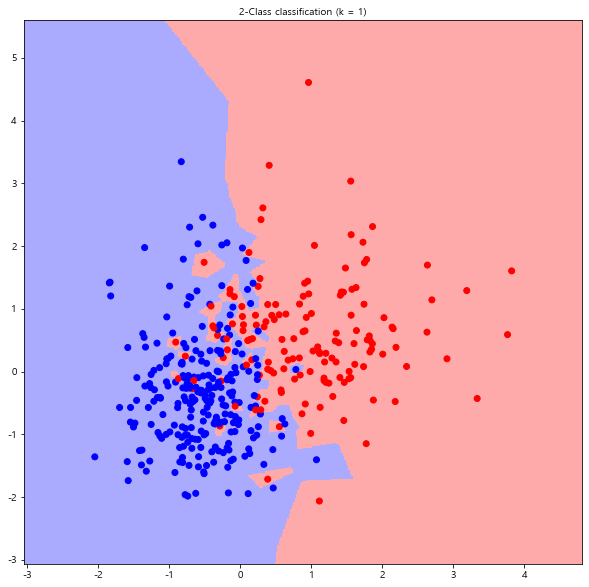

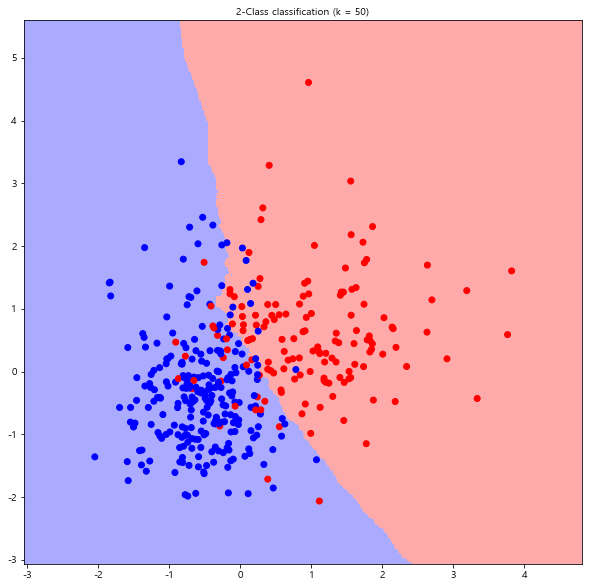

In [6]:
X_vis = X_tr[:, :2] # take two features
y_vis = y_tr.values.ravel()

h= .02

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for k in [1, 50]:
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_vis, y_vis)
    
    x_min, x_max = X_vis[:,0].min() -1, X_vis[:,0].max() + 1
    y_min, y_max = X_vis[:,1].min() -1, X_vis[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 10))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.scatter(X_vis[:,0], X_vis[:,1], c=y_vis, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"2-Class classification (k = {k})", fontsize=10)
    
plt.show()

tqdm이란
의도한 대로 돌아가는지 진행상황이 궁금할 때 상태 확인할 수 있다.

tqdm parameter
iterable
desc
total

In [7]:
'''# Iterable-based
import time
text = ''
for char in tqdm(['a', 'b', 'c']):
    time.sleep(0.25)
    text = text + char'''

"# Iterable-based\nimport time\ntext = ''\nfor char in tqdm(['a', 'b', 'c']):\n    time.sleep(0.25)\n    text = text + char"

In [8]:
k_list = [i for i in range(1, 100) if i % 2 !=0]
cv_scores = []

for k in tqdm(k_list, desc='진행상황'):
    classifier = KNeighborsClassifier(n_neighbors = k, p=2)
    # 1: manhattan,2: euclidean,3: minkowski
    scores = cross_val_score(classifier, X_tr, y_tr, cv= 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())


진행상황: 100%|██████████| 50/50 [01:06<00:00,  1.32s/it]


In [9]:
best_k = [k_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
print('Best k value' , best_k)

Best k value [5]


In [10]:
k_list= [i for i in range(1, 100) if i % 2!=0]

euc = []
for k in tqdm(k_list):
    classifier = KNeighborsClassifier(n_neighbors = k, p=2)
    scores = cross_val_score(classifier, X_tr, y_tr, cv=10, scoring='accuracy')
    euc.append(scores.mean())

100%|██████████| 50/50 [01:07<00:00,  1.35s/it]


In [11]:
k_list= [i for i in range(1, 100) if i % 2!=0]

man = []
for k in tqdm(k_list):
    classifier = KNeighborsClassifier(n_neighbors = k, p=1)
    scores = cross_val_score(classifier, X_tr, y_tr, cv=10, scoring='accuracy')
    man.append(scores.mean())

100%|██████████| 50/50 [00:54<00:00,  1.09s/it]


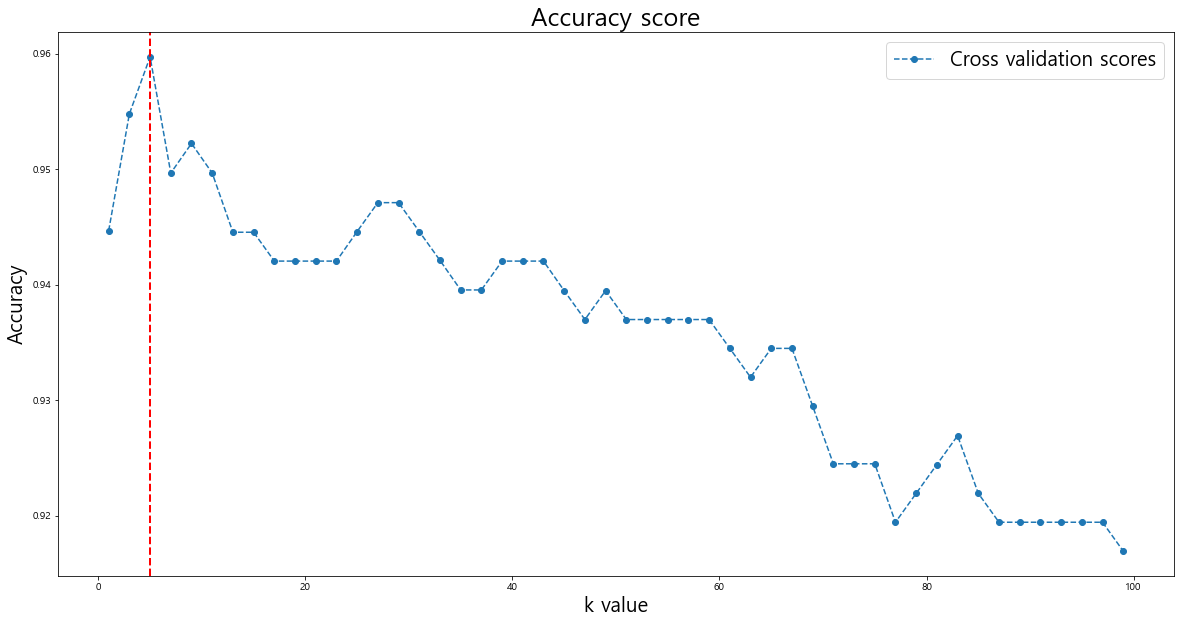

In [12]:
plt.figure(figsize=(20,10))
plt.plot(k_list, euc, marker='o', linestyle='dashed')
plt.legend(['Cross validation scores'], fontsize=20)
plt.xlabel('k value', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.title('Accuracy score', fontsize=25)
plt.axvline(best_k[0], color = 'r', linestyle='--', linewidth=2)
plt.show()

In [13]:
y_tr = y_tr.values.ravel()
kf = KFold(n_splits=10)
kf.get_n_splits(X_tr)

k_list = [i for i in range(1, 100) if i % 2!=0]

mah = []
for k in tqdm(k_list):
    mah_acc = []
    for train_index, valid_index in kf.split(X_tr):
        X_train_f = X_tr[train_index]
        y_train_f = y_tr[train_index]
        
        X_valid_f = X_tr[valid_index]
        y_valid_f = y_tr[valid_index]
        
        total = len(y_valid_f)
        correct = 0
        
        nn = NearestNeighbors(algorithm = 'brute', metric = 'mahalanobis',
                              metric_params={'VI':np.cov(X_train_f, rowvar=False)}, n_neighbors=k)
        nn_model = nn.fit(X_train_f, y_train_f)
        
        for v in range(len(X_valid_f)):
            distance, indices = nn_model.kneighbors(X_valid_f[v].reshape(1,-1))
            
            class_list = {'0':0, '1':0}
            for i in range(len(indices[0])):
                if y_train_f[indices[0][i]] ==0:
                    class_list['0'] += 1
                else:
                    class_list['1'] += 1
                    
            max_key = np.int(max(class_list, key=class_list.get))
            if max_key == y_valid_f[v]:
                correct += 1
                
        mah_acc.append(correct/total)
    mah.append(np.mean(mah_acc))
                

100%|██████████| 50/50 [00:40<00:00,  1.24it/s]


In [14]:
kf = KFold(n_splits=10)
kf.get_n_splits(X_tr)

k_list = [i for i in range(1, 100) if i % 2!=0]

pear = []
for k in tqdm(k_list):
    pear_acc = []
    for train_index, valid_index in kf.split(X_tr):
        X_train_f = X_tr[train_index]
        y_train_f = y_tr[train_index]
        
        X_valid_f = X_tr[valid_index]
        y_valid_f = y_tr[valid_index]
        
        total = len(y_valid_f)
        correct = 0
        
        nn = NearestNeighbors(metric = 'correlation', n_neighbors=k)
        nn_model = nn.fit(X_train_f, y_train_f)
        
        for v in range(len(X_valid_f)):
            distance, indices = nn_model.kneighbors(X_valid_f[v].reshape(1,-1))
            
            class_list = {'0':0, '1':0}
            for i in range(len(indices[0])):
                if y_train_f[indices[0][i]] ==0:
                    class_list['0'] += 1
                else:
                    class_list['1'] += 1
                    
            max_key = np.int(max(class_list, key=class_list.get))
            if max_key == y_valid_f[v]:
                correct += 1
                
        pear_acc.append(correct/total)
    pear.append(np.mean(pear_acc))

100%|██████████| 50/50 [00:32<00:00,  1.53it/s]


In [15]:
def spearmancorr(x,y):
    rho, pval = spearmanr(x, y, axis=0)
    return 1-rho

kf = KFold(n_splits=10)
kf.get_n_splits(X_tr)

k_list = [i for i in range(1, 100) if i % 2!=0]

spear = []
for k in tqdm(k_list):
    spear_acc = []
    for train_index, valid_index in kf.split(X_tr):
        X_train_f = X_tr[train_index]
        y_train_f = y_tr[train_index]
        
        X_valid_f = X_tr[valid_index]
        y_valid_f = y_tr[valid_index]
        
        total = len(y_valid_f)
        correct = 0
        
        nn = NearestNeighbors(metric = spearmancorr, algorithm = 'ball_tree', n_neighbors=k)
        nn_model = nn.fit(X_train_f, y_train_f)
        
        for v in range(len(X_valid_f)):
            distance, indices = nn_model.kneighbors(X_valid_f[v].reshape(1,-1))
            
            class_list = {'0':0, '1':0}
            for i in range(len(indices[0])):
                if y_train_f[indices[0][i]] ==0:
                    class_list['0'] += 1
                else:
                    class_list['1'] += 1
                    
            max_key = np.int(max(class_list, key=class_list.get))
            if max_key == y_valid_f[v]:
                correct += 1
                
        spear_acc.append(correct/total)
    spear.append(np.mean(spear_acc))

100%|██████████| 50/50 [58:02<00:00, 69.64s/it]  


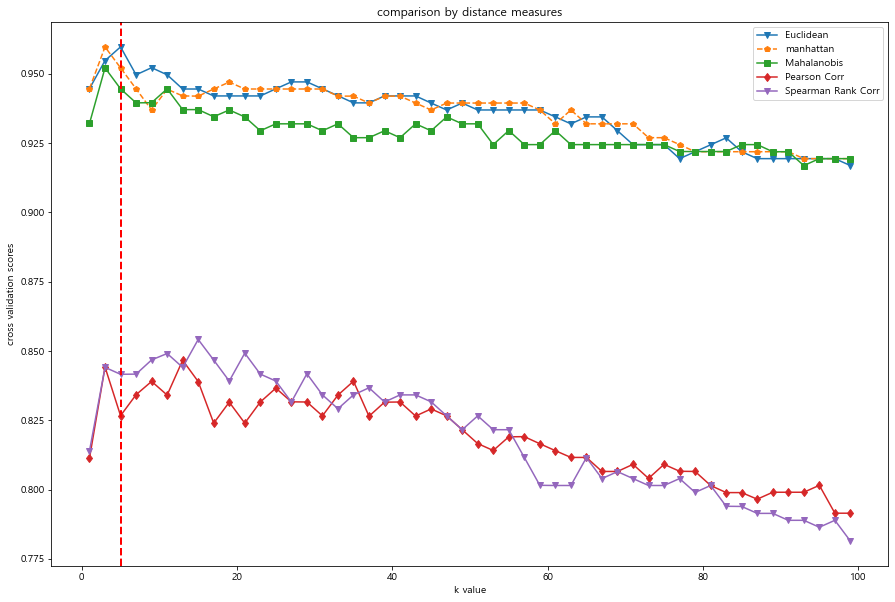

In [17]:
plt.figure(figsize = (15, 10))
plt.plot(k_list, euc, marker='v')
plt.plot(k_list, man, linestyle='dashed', marker='p')
plt.plot(k_list, mah, marker='s')
plt.plot(k_list, pear, marker='d')
plt.plot(k_list, spear, marker='v')
plt.axvline(5, color='r', linestyle='--', linewidth =2)
plt.xlabel('k value')
plt.ylabel('cross validation scores')
plt.title('comparison by distance measures')
plt.legend(['Euclidean', 'manhattan', 'Mahalanobis', 'Pearson Corr', 'Spearman Rank Corr'])
plt.show()

In [19]:
classifier = KNeighborsClassifier(n_neighbors = 5, p=2)
classifier.fit(X_tr, y_tr)
y_pred = classifier.predict(X_te)

acc= accuracy_score(y_true = y_te, y_pred = y_pred) # 정확도
recall = recall_score(y_true = y_te, y_pred = y_pred) # 민감도
precision = precision_score(y_true = y_te, y_pred = y_pred) # 정밀도

print('정확도', acc, '민감도', recall, '정밀도', precision)

정확도 0.9766081871345029 민감도 0.9906542056074766 정밀도 0.9724770642201835


100%|██████████| 50/50 [00:30<00:00,  1.63it/s]

best k value: [5]


AttributeError: module 'matplotlib.pyplot' has no attribute 'legned'

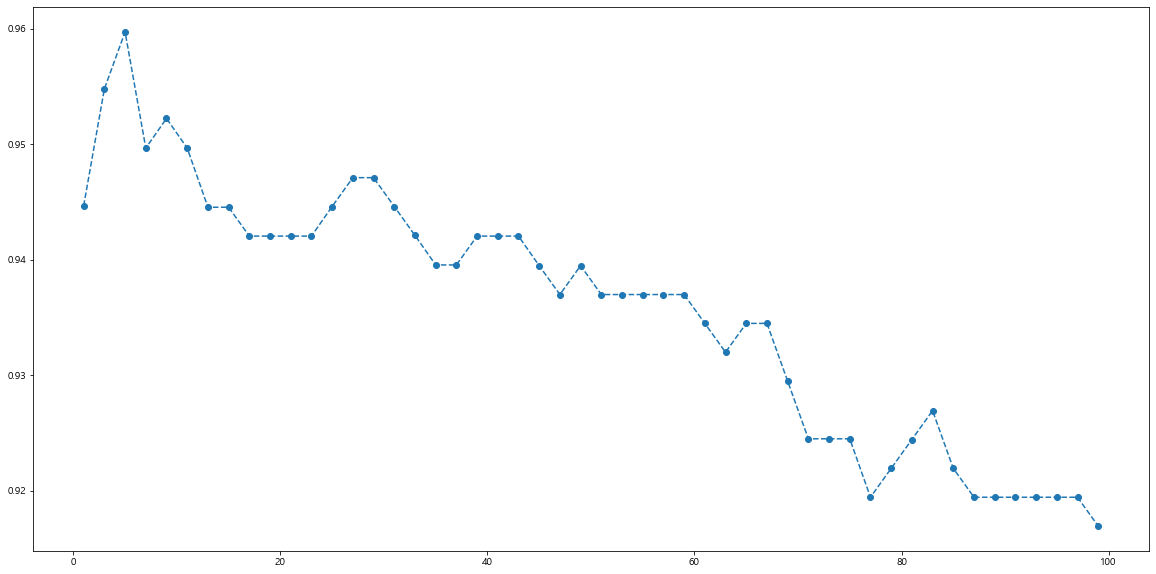

In [23]:
# weighted KNN
k_list = [i for i in range(1, 100) if i %2 != 0]

euc = []
for k in tqdm(k_list):
    classifier = KNeighborsClassifier(n_neighbors = k, p=2, weights = 'distance')
    # weights : uniform disance
    scores = cross_val_score(classifier, X_tr, y_tr, cv =10, scoring = 'accuracy')
    euc.append(scores.mean())
best_k = [k_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
print('best k value:', best_k)



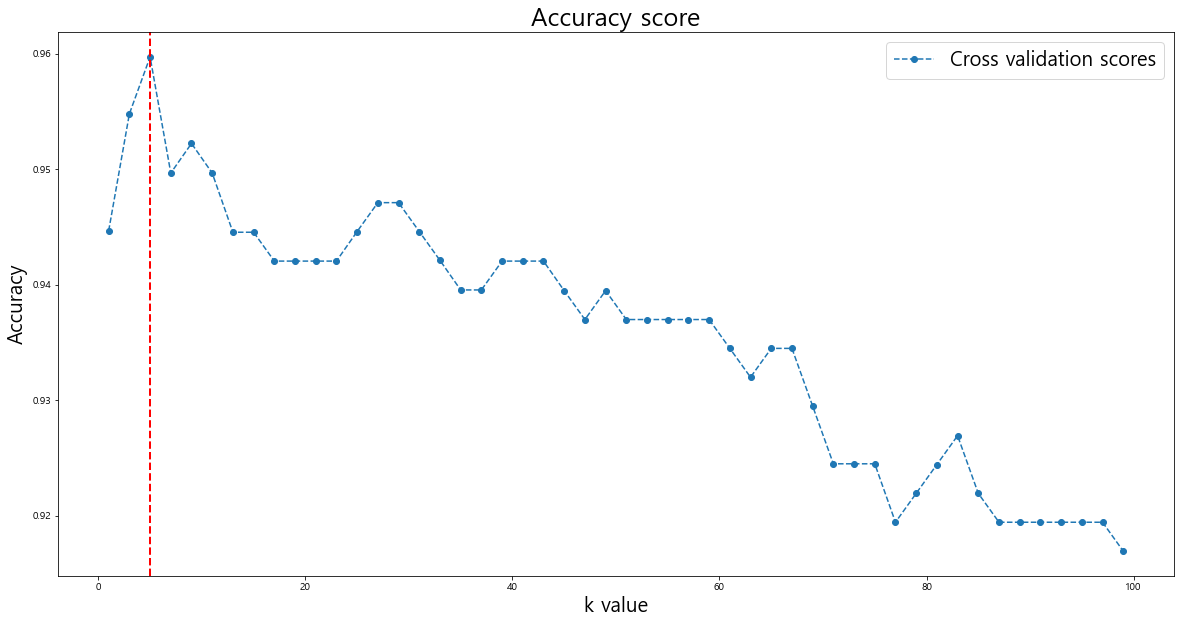

In [26]:
plt.figure(figsize=(20, 10))
plt.plot(k_list, cv_scores, marker = 'o', linestyle = 'dashed')
plt.legend(['Cross validation scores'], fontsize =20)
plt.xlabel('k value', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.title('Accuracy score', fontsize = 25)
plt.axvline(best_k[0], color='r', linestyle='--', linewidth = 2)
plt.show()

In [27]:
classifier = KNeighborsClassifier(n_neighbors = 5, p=2, weights = 'distance')
classifier.fit(X_tr, y_tr)
y_pred = classifier.predict(X_te)

acc= accuracy_score(y_true = y_te, y_pred = y_pred) # 정확도
recall = recall_score(y_true = y_te, y_pred = y_pred) # 민감도
precision = precision_score(y_true = y_te, y_pred = y_pred) # 정밀도

print('정확도', acc, '민감도', recall, '정밀도', precision)

정확도 0.9766081871345029 민감도 0.9906542056074766 정밀도 0.9724770642201835


In [32]:
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.


100%|██████████| 50/50 [00:03<00:00, 16.66it/s]


Best k value: [[3]]


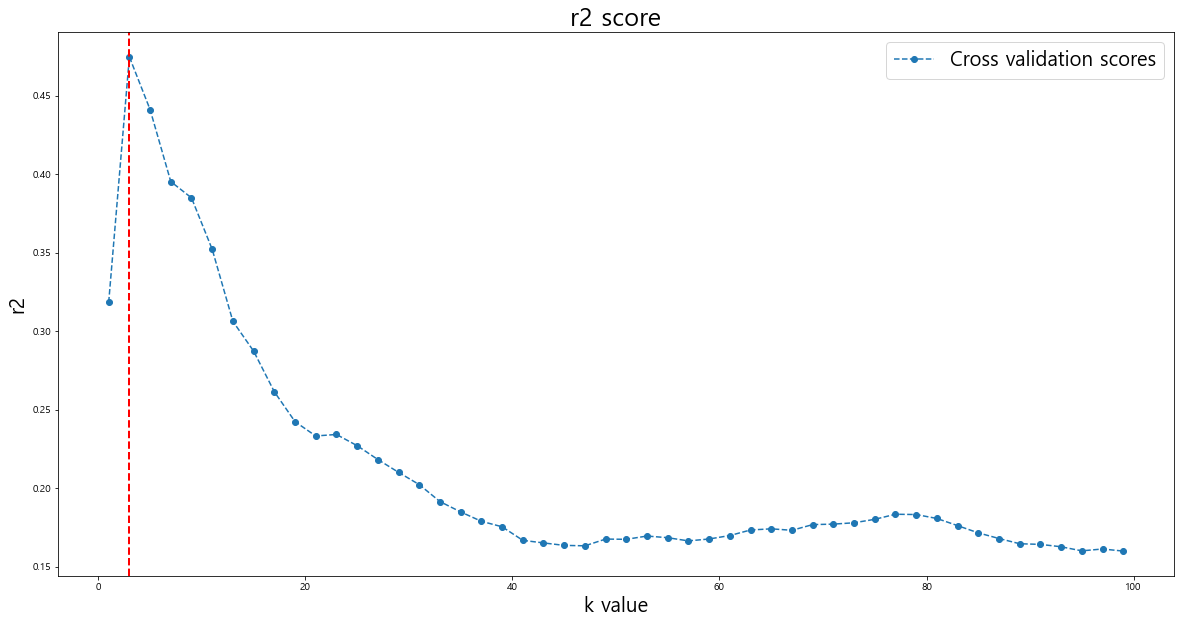

In [35]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2022)

k_list = [i for i in range(1, 100) if i%2 != 0]
cv_scores = []
for k in tqdm(k_list):
    regressor = KNeighborsRegressor(n_neighbors = k, p=2)
    
    scores = cross_val_score(regressor, X_train, y_train, cv = 10, scoring= 'r2')
    cv_scores.append(scores.mean())
    
best_k = [[k_list[i]] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]

print('Best k value:', best_k)

plt.figure(figsize=(20, 10))
plt.plot(k_list, cv_scores, marker = 'o', linestyle = 'dashed')
plt.legend(['Cross validation scores'], fontsize =20)
plt.xlabel('k value', fontsize = 20)
plt.ylabel('r2', fontsize = 20)
plt.title('r2 score', fontsize = 25)
plt.axvline(best_k[0], color='r', linestyle='--', linewidth = 2)
plt.show()